In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_circles
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

### Foncitons

In [21]:
def init(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }
    return parametres

def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations


def back_propagation(X, y, activations: dict, parametres: dict):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return gradients

def update(gradients: dict, parametres: dict, learning_rate):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1 
    W2 = W2 - learning_rate * dW2 
    b2 = b2 - learning_rate * db2 

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }
    return parametres

def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [74]:
def neural_network(X_train, y_train, n1=32, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]

    parametres = init(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        # mise a jour
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

    x_min, x_max = X_train[0, :].min(), X_train[0, :].max() + 0.1
    y_min, y_max = X_train[1, :].min(), X_train[1, :].max() + 0.1

    # Créer une grille de points à évaluer par le modèle
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parametres)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 3)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap='summer')
    plt.contour(xx, yy, Z, alpha=1, colors='red', linewidths=1)
    plt.scatter(X_train[0, :], X_train[1, :], c=y_train, cmap='summer')
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

dimensions de X: (2, 100)
dimensions de y: (1, 100)


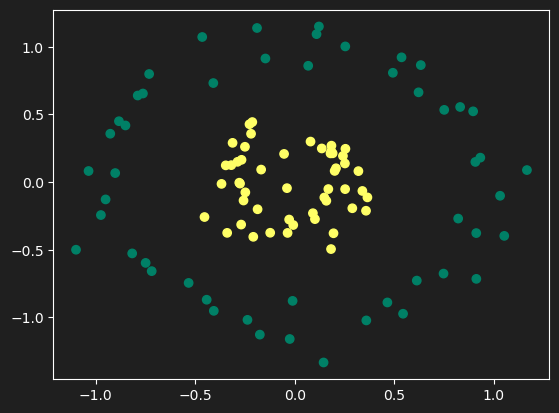

In [62]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T 
y = y.reshape(1, y.shape[0])

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1475.02it/s]


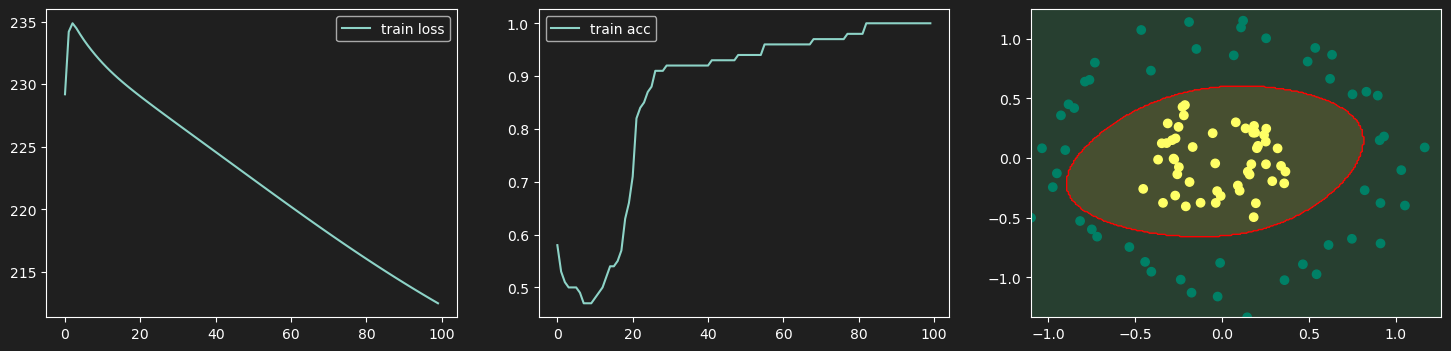

In [75]:
params = neural_network(X, y, n1=32, n_iter=1000, learning_rate=0.1)

### Test frontiere de décision

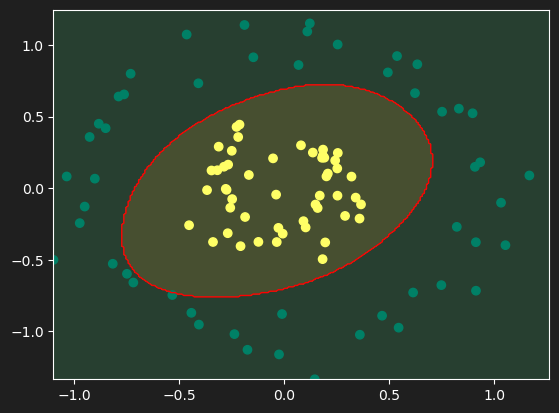

In [60]:
x_min, x_max = X[0, :].min(), X[0, :].max() + 0.1
y_min, y_max = X[1, :].min(), X[1, :].max() + 0.1

# Créer une grille de points à évaluer par le modèle
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = predict(np.c_[xx.ravel(), yy.ravel()].T, params)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.25, cmap='summer')
plt.contour(xx, yy, Z, alpha=1, colors='red', linewidths=1)
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()